# Boat Owners Newsletter

This Jupyter Notebook aims to support the data cleaning, exploration, analysis and visualisation of the _boat_data.csv_ dataset in order to support the weekly newsletter for boat owners. This newsletter helps sellers to get more views on their boats and understand in more depth the market trends.

## 0. Importing Libraries and Initial Setup

In [22]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
from pycountry import countries

## 1. Importing Data

### 1.1. Importing and Exploring the Dataset _boat_data.csv_

In [23]:
boat_df = pd.read_csv('datasets/boat_data.csv')
boat_df.head(10)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58
5,CHF 3650,Sport Boat,Linder power boats,new boat from stock,0,4.03,1.56,Aluminium,Switzerland Â» Lake Constance Â» Uttwil,132
6,CHF 3600,Catamaran,NaN,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,Switzerland Â» Neuenburgersee Â» Yvonand,474
7,DKK 24800,Sport Boat,NaN,Used boat,0,3.00,NaN,NaN,Denmark Â» Svendborg,134
8,EUR 3333,Fishing Boat,Crescent power boats,new boat from stock,2019,3.64,1.37,NaN,Germany Â» Bayern Â» Boote+service Oberbayern,45
9,EUR 3300,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.35,1.73,NaN,Italy Â» Dormelletto,180


In [24]:
boat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


In [25]:
boat_df.nunique()

Price                          3182
Boat Type                       126
Manufacturer                    910
Type                             24
Year Built                      122
Length                         1612
Width                           575
Material                         11
Location                       2995
Number of views last 7 days     674
dtype: int64

At an initial glance, the data needs to be cleaned and transformed such that:
* The 'Price' column shall be converted to a standard currency, the currency will be decided in Section 2.1 depending on the nature of the data. It shall also be transformed into a numeric value deleting the first three letters of the strings, as they represent the currency.
* Values missing in the 'Year Built' are assumed to be 0. While this is a valid approach for other applications, in this case rows where the Year Built is 0 must be converted to NaN.
* The amount of distinct elements in the 'Type' and 'Boat Type' column suggests that the information in the column is not concisely descriptive. The information will be split into different columns to be more easily filtered for the analysis.
* The 'Location' column shall be transformed to delete illegible characters. The countries will be kept as they are in English and don't seem to contain special characters.
* The string 'power boats' seems to be repeated often in the 'Manufacturer', therefore, it can be dropped.

## 2. Data Cleaning & Transformation

### 2.1. 'Price' Column Cleaning

In [26]:
prices = boat_df['Price'].str.split(" ", expand=True)
prices[0].value_counts()

EUR    8430
CHF     980
Â£      298
DKK     180
Name: 0, dtype: int64

As Euro (EUR) is the most common currency in the dataset, the other currencies will be transformed into Euros.

In [27]:
prices = boat_df['Price'].str.split(" ", expand=True)
prices[1] = pd.to_numeric(prices[1])

# Source https://www.xe.com/
chf2eur = 0.96
gbp2eur = 1.20
dkk2eur = 0.13

prices.loc[prices[0] == 'CHF', 1] *= chf2eur
prices.loc[prices[0] == 'Â£', 1] *= gbp2eur
prices.loc[prices[0] == 'DKK', 1] *= dkk2eur

boat_df['Price'] = prices[1]
boat_df.rename(columns={"Price":"Price_EUR"}, inplace=True)

boat_df.head()

,Price_EUR,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,3203.52,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,3490.00,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,3619.20,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,3367.00,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,3399.00,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


### 2.2 'Year Built' Column Transformation

Values missing in the 'Year Built' are assumed to be 0. Rows where the Year Built is 0 must be converted to NaN.

In [28]:
print('Initially, the quantity of Zeros in the DataFrame is {} and {} NaN\'s.'.format((boat_df["Year Built"]==0).sum(),boat_df["Year Built"].isna().sum()))

boat_df["Year Built"] = boat_df["Year Built"].replace(0,np.nan)

print('After the transformation, the amount of Zeros is now {} and the count of NaN values has increased to {}.'.format((boat_df["Year Built"]==0).sum(),boat_df["Year Built"].isna().sum()))

Initially, the quantity of Zeros in the DataFrame is 551 and 0 NaN's.
After the transformation, the amount of Zeros is now 0 and the count of NaN values has increased to 551.


### 2.3. 'Manufacturer' Column Analysis

In [29]:
count = boat_df["Manufacturer"].str.contains("power boats").sum()
len_col = len(boat_df["Manufacturer"])
na_in_col = boat_df["Manufacturer"].isnull().sum()

print('In the \'Manufacturer\' column, the string \'power boats\' is repeated {} times.'.format(count))

print('The length of the column is {}, substracting the null values of the column {}:'.format(len_col,na_in_col))
print('The amount of non null values is therefore {}.'.format(len_col-na_in_col))

In the 'Manufacturer' column, the string 'power boats' is repeated 8550 times.
The length of the column is 9888, substracting the null values of the column 1338:
The amount of non null values is therefore 8550.


As the amount of times that the string 'power_boats' is repeated coincides with the amount of non-null values in the column, the string can be dropped from the entire column for simplicity.

In [30]:
boat_df["Manufacturer"] = boat_df["Manufacturer"].replace({" power boats":""}, regex=True)
boat_df["Manufacturer"].head()

0    Rigiflex
1       Terhi
2      Marine
3      Pioner
4      Linder
Name: Manufacturer, dtype: object

### 2.4. 'Type' Column Transformation

In [31]:
print(boat_df["Type"].unique())

['new boat from stock' 'Used boat,Unleaded' 'Used boat'
 'Used boat,Electric' 'new boat from stock,Unleaded' 'Used boat,Diesel'
 'new boat on order' 'Unleaded' 'new boat on order,Unleaded'
 'new boat from stock,Gas' 'Diesel' 'Display Model,Unleaded'
 'Display Model' nan 'Used boat,Gas' 'new boat from stock,Diesel'
 'new boat from stock,Electric' 'new boat on order,Diesel'
 'new boat from stock,Hybrid' 'Display Model,Diesel' 'Used boat,Hybrid'
 'Display Model,Gas' 'Display Model,Electric' 'Electric'
 'Used boat,Propane']


From the structure of the column, it is necessary to perform one hot enconding in order to separate the categorical variables in different columns. The function _pd.get_dummies_ is a simple approach to it.

In [32]:
pd.get_dummies(boat_df["Type"]).head()

,Diesel,Display Model,"Display Model,Diesel","Display Model,Electric","Display Model,Gas","Display Model,Unleaded",Electric,Unleaded,Used boat,"Used boat,Diesel",...,"Used boat,Unleaded",new boat from stock,"new boat from stock,Diesel","new boat from stock,Electric","new boat from stock,Gas","new boat from stock,Hybrid","new boat from stock,Unleaded",new boat on order,"new boat on order,Diesel","new boat on order,Unleaded"
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


However, the function _get_dummies_ will not split the entries of the column.

In order to do so, a function needs to be written to perform this operation. Note that this function will be reused for the 'Boat Type' column for the similarity of its structure.

In [33]:
def one_hot_col(boat_df, col):
    boat_df[col] = boat_df[col].replace([np.nan],None)
    a = boat_df[col].str.split(',', expand=True).values.ravel()
    unis = pd.unique(a)
    unis = unis[unis != np.array(None)]
    col_names = [col + ' ' + str(i) for i in unis]

    df1 = pd.DataFrame(data = np.zeros((len(boat_df), len(unis)), dtype=int), columns = col_names)

    for entry, col_name in zip(unis, col_names):
        df1.loc[boat_df[boat_df[col].notnull() & boat_df[col].str.contains(entry)].index, col_name] = 1
    
    return df1

boat_Type = one_hot_col(boat_df, 'Type')
boat_Type.head()

,Type new boat from stock,Type Used boat,Type Unleaded,Type Electric,Type Diesel,Type new boat on order,Type Gas,Type Display Model,Type Hybrid,Type Propane
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


### 2.5. 'Boat Type' Column Transformation

In [34]:
boat_Boat_Type = one_hot_col(boat_df, 'Boat Type')
boat_Boat_Type.head()

,Boat Type Motor Yacht,Boat Type Center console boat,Boat Type Sport Boat,Boat Type Fishing Boat,Boat Type Catamaran,Boat Type Pontoon Boat,Boat Type Runabout,Boat Type Deck Boat,Boat Type Pilothouse,Boat Type Cabin Boat,...,Boat Type Water ski,Boat Type Hardtop,Boat Type Offshore Boat,Boat Type Wakeboard/Wakesurf,Boat Type Passenger boat,Boat Type House Boat,Boat Type Motorsailer,Boat Type Ketch,Boat Type Mega Yacht,Boat Type RIB
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Joining both _boat_Type_ and _boat_Boat_Type_ to the original DataFrames:

In [35]:
boat_df = boat_df.join([boat_Type,boat_Boat_Type])
boat_df = boat_df.drop(columns=['Type','Boat Type'])
boat_df.head()

,Price_EUR,Manufacturer,Year Built,Length,Width,Material,Location,Number of views last 7 days,Type new boat from stock,Type Used boat,...,Boat Type Water ski,Boat Type Hardtop,Boat Type Offshore Boat,Boat Type Wakeboard/Wakesurf,Boat Type Passenger boat,Boat Type House Boat,Boat Type Motorsailer,Boat Type Ketch,Boat Type Mega Yacht,Boat Type RIB
0,3203.52,Rigiflex,2017.0,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3490.00,Terhi,2020.0,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3619.20,Marine,NaN,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3367.00,Pioner,2020.0,3.00,1.00,NaN,Denmark Â» Svendborg,64,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3399.00,Linder,2019.0,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,1,0,...,0,0,0,0,0,0,0,0,0,0


### 2.6. 'Location' Column Transformation

From the look of it, it seems that country names are stored before the ' Â» ' string in each row. An initial approach to be taken is to split the rows using that character and visually inspecting the unique results.

In [36]:
boat_Country = boat_df["Location"].str.split(" Â» ", expand=True)[0]
boat_Country.unique()

array(['Switzerland', 'Germany', 'Denmark', 'Italy', 'France',
       'United Kingdom', 'Spain', 'Austria', 'Netherlands', 'Slovenia',
       'Serbia', 'Belgium', 'Slovak Republic', 'Croatia (Hrvatska)',
       'Portugal', 'Malta', 'Montenegro', 'Latvia', 'Rovinij',
       'Steinwiesen', 'Greece', 'Rolle', 'Poland', 'baden baden', 'Donau',
       'TravemÃ¼nde ', 'Lake Constance', 'Turkey', 'Stralsund ',
       'Rostock ', 'Lake Geneva', 'Split', 'Finland', 'lago maggiore',
       'BelgiÃ«, Zulte ', 'Niederrhein', 'Hungary',
       'Brandenburg an derHavel', 'RÃ¼gen', 'Zevenbergen', 'Oder',
       'Cyprus', 'Faoug', 'Beilngries ', 'Czech Republic', 'Sweden',
       'Lithuania', 'United States', 'Marina Punat', 'Ukraine',
       'French Southern Territories', 'Italien ', 'Brandenburg ', nan,
       'Estonia', 'Monaco', 'Russian Federation', 'waren mÃ¼ritz ',
       'Egypt', 'Jersey', 'United Arab Emirates', 'Australia', 'Bulgaria',
       'Philippines', 'Taiwan', 'Thailand', 'Luxembourg'

Unfortunately, it is not going to be as easy as that, some rows contain region names instead of countries.

In order to obtain the country names, the _geopy_ library is used to revert the country name from the region name.

In [37]:
geo = Nominatim(user_agent='rev')
possibilities = ', ()abcdefghijklmnopqrstuvwxyz'
condition = boat_Country.str.lower().str.strip(possibilities).astype(bool) == True
locs = boat_Country[~condition].unique()
boat_Country[condition] = None

count_dict = {}

for i in locs:
    try:
        countries.lookup(i)
        count_dict[i] = i
    except:
        locator = geo.geocode(i)
        if locator != None:
            rever = geo.reverse(locator.point, language='en')
            if rever != None:
                country = rever.raw['address']['country']
                count_dict[i] = country
        else:
            count_dict[i] = None

boat_df["Location"] = boat_Country.replace(to_replace=count_dict.keys(),value=count_dict.values())

boat_df["Location"].unique()

array(['Switzerland', 'Germany', 'Denmark', 'Italy', 'France',
       'United Kingdom', 'Spain', 'Austria', 'Netherlands', 'Slovenia',
       'Serbia', 'Belgium', 'Slovak Republic', 'Croatia', 'Portugal',
       'Malta', 'Montenegro', 'Latvia', None, 'Greece', 'Poland',
       'Hungary', 'Turkey', 'United States', 'Finland', 'Cyprus',
       'Czech Republic', 'Sweden', 'Lithuania', 'Ukraine',
       'French Southern Territories', 'Estonia', 'Monaco',
       'Russian Federation', 'Egypt', 'Jersey', 'United Arab Emirates',
       'Australia', 'Bulgaria', 'Philippines', 'Taiwan', 'Thailand',
       'Luxembourg', 'Venezuela', 'Ireland', 'Martinique', 'Norway',
       'Seychelles', 'Morocco', 'Gibraltar', 'Lebanon', 'Ostsee',
       'Isle of Man', 'Romania'], dtype=object)

In [38]:
boat_df.head()

,Price_EUR,Manufacturer,Year Built,Length,Width,Material,Location,Number of views last 7 days,Type new boat from stock,Type Used boat,...,Boat Type Water ski,Boat Type Hardtop,Boat Type Offshore Boat,Boat Type Wakeboard/Wakesurf,Boat Type Passenger boat,Boat Type House Boat,Boat Type Motorsailer,Boat Type Ketch,Boat Type Mega Yacht,Boat Type RIB
0,3203.52,Rigiflex,2017.0,4.00,1.90,NaN,Switzerland,226,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3490.00,Terhi,2020.0,4.00,1.50,Thermoplastic,Germany,75,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3619.20,Marine,NaN,3.69,1.42,Aluminium,Switzerland,124,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3367.00,Pioner,2020.0,3.00,1.00,NaN,Denmark,64,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3399.00,Linder,2019.0,3.55,1.46,Aluminium,Germany,58,1,0,...,0,0,0,0,0,0,0,0,0,0


### 2.7 Exporting Dataframe

Once cleaned, in order to speed up the execution of the code, the dataframe is saved into a pickle file.

In [39]:
boat_df.to_pickle('pickles/clean_boat_data.pkl')

## 3. Visualisation of Data

Note that to speed up the code execution, the _clean_boat_data_ pickle is loaded.

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

clean_boats = pd.read_pickle('pickles/clean_boat_data.pkl')
clean_boats.head()

,Price_EUR,Manufacturer,Year Built,Length,Width,Material,Location,Number of views last 7 days,Type new boat from stock,Type Used boat,...,Boat Type Water ski,Boat Type Hardtop,Boat Type Offshore Boat,Boat Type Wakeboard/Wakesurf,Boat Type Passenger boat,Boat Type House Boat,Boat Type Motorsailer,Boat Type Ketch,Boat Type Mega Yacht,Boat Type RIB
0,3203.52,Rigiflex,2017.0,4.00,1.90,NaN,Switzerland,226,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3490.00,Terhi,2020.0,4.00,1.50,Thermoplastic,Germany,75,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3619.20,Marine,NaN,3.69,1.42,Aluminium,Switzerland,124,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3367.00,Pioner,2020.0,3.00,1.00,NaN,Denmark,64,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3399.00,Linder,2019.0,3.55,1.46,Aluminium,Germany,58,1,0,...,0,0,0,0,0,0,0,0,0,0


According to the Case Study description, we are interested on learning more about the characteristics of the most viewed boat listings in the last 7 days. For that, the 100 most viewed listings are analysed.

_They would like you to take a look at the recent data and help them learn more about the characteristics of the most viewed boat listings in the last 7 days:_
* _Is it the most expensive boats that get the most views?_
* _Are there common features among the most viewed boats?_

In [41]:
clean_boats = clean_boats.sort_values('Number of views last 7 days', ascending=False)
clean_boats['is_top'] = 'All Listings'
clean_boats['is_top'].iloc[:100] = 'Top 100'
top100_boats = clean_boats[:100]

per_views = sum(top100_boats['Number of views last 7 days'])/sum(clean_boats['Number of views last 7 days'])*100

print('Choosing the Top 100, we are choosing the top {}% of the listings.'.format(round(per_views,2)))


Choosing the Top 100, we are choosing the top 7.61% of the listings.


C:\Users\manue\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [42]:
def plot_std(tot_dat, typ, x_col, y_col, tit, xlab, ylab, log_sel, alph_tot, alph_100, top_100=None):
    fig1 = plt.figure(figsize=(12,8))

    ax = plt.gca()

    sel_color = 'darkturquoise'
    sel_total = 'dimgrey'

    if typ == 's':
        sns.scatterplot(data=tot_dat, x=x_col, y=y_col, color=sel_total, alpha=alph_tot, label='All Listings')
        sns.scatterplot(data=top_100, x=x_col, y=y_col, color=sel_color,alpha=alph_100, label='Top 100')
    elif typ == 'v':
        sns.violinplot(x=x_col, y=y_col, data=tot_dat, palette=[sel_color, sel_total])
    elif typ == 'b':
        sns.barplot(x=tot_dat.index, y=tot_dat, label='All listings', color=sel_total)    
        ax = sns.barplot(x=top_100.index, y=top_100, label='Popular listings', color=sel_color)
        for i in ax.containers:
            ax.bar_label(i,)

    plt.title(tit, color=sel_total, fontweight="bold", fontsize=16)
    plt.xlabel(xlab, color=sel_total, fontweight="bold", fontsize=16)
    plt.ylabel(ylab, color=sel_total, fontweight="bold", fontsize=16)
    plt.legend(fontsize=14)

    if log_sel == True:
        ax.set_yscale('log')
        ax.set_xscale('log')

    ax.tick_params(color=sel_total, labelcolor=sel_total)

    for spine in ax.spines.values():
        spine.set_edgecolor(sel_total)

    fig1.tight_layout()

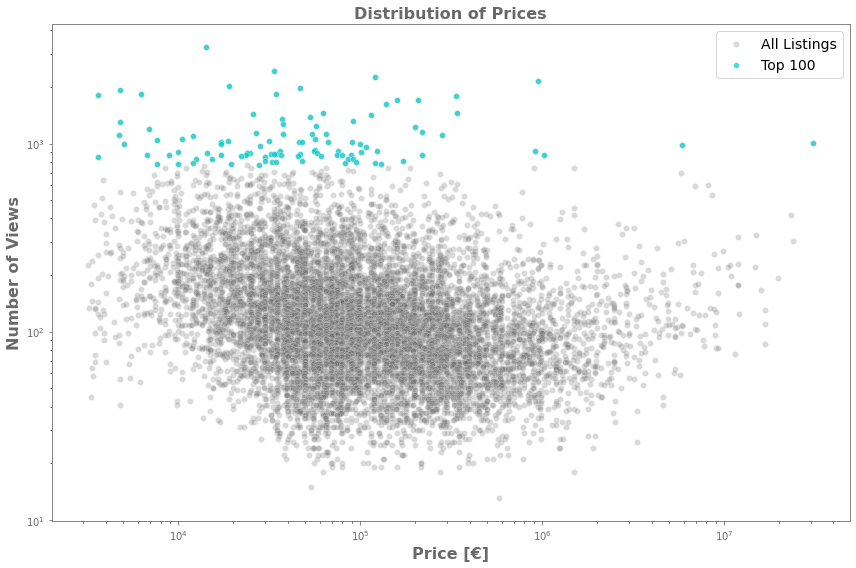

In [43]:
plot_std(tot_dat=clean_boats, top_100=top100_boats, typ='s',
        x_col='Price_EUR', y_col='Number of views last 7 days',
        tit='Distribution of Prices', xlab='Price [€]', ylab='Number of Views',
        log_sel=True, alph_tot=.25, alph_100=.7)

In [44]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [45]:
data = clean_boats.sort_values('Price_EUR')
data_sorted = data['Price_EUR'].to_list()

data_100 = top100_boats.sort_values('Price_EUR')
data_sorted_100 = data_100['Price_EUR'].to_list()

x, y = ecdf(data_sorted)
x_top, y_top = ecdf(data_sorted_100)

ecdf_tot = pd.DataFrame({'x':x,'y':y})
ecdf_100 = pd.DataFrame({'x':x_top,'y':y_top})

# Specify array of percentiles: percentiles
percentiles = np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(data['Price_EUR'],percentiles)
ptiles_vers1 = np.percentile(data_100['Price_EUR'],percentiles)

print(ptiles_vers)
print(ptiles_vers1)

[   9695.64   42937.5    91991.5   247568.28 1800000.  ]
[  4749.144  19008.     41589.     91200.    986275.   ]


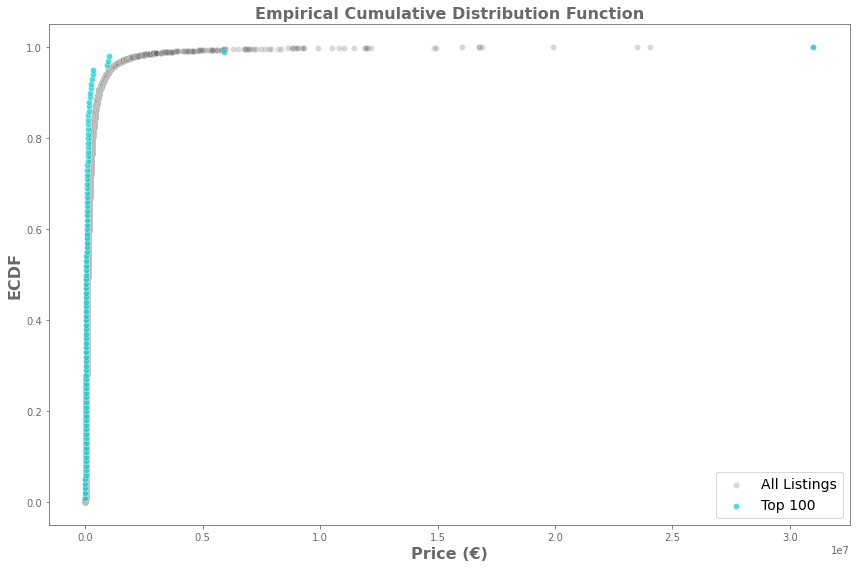

In [46]:
plot_std(tot_dat=ecdf_tot, top_100=ecdf_100, typ='s',
        x_col='x', y_col='y',
        tit='Empirical Cumulative Distribution Function', xlab='Price (€)', ylab='ECDF',
        log_sel=False,alph_tot=.25, alph_100=0.7)

No handles with labels found to put in legend.


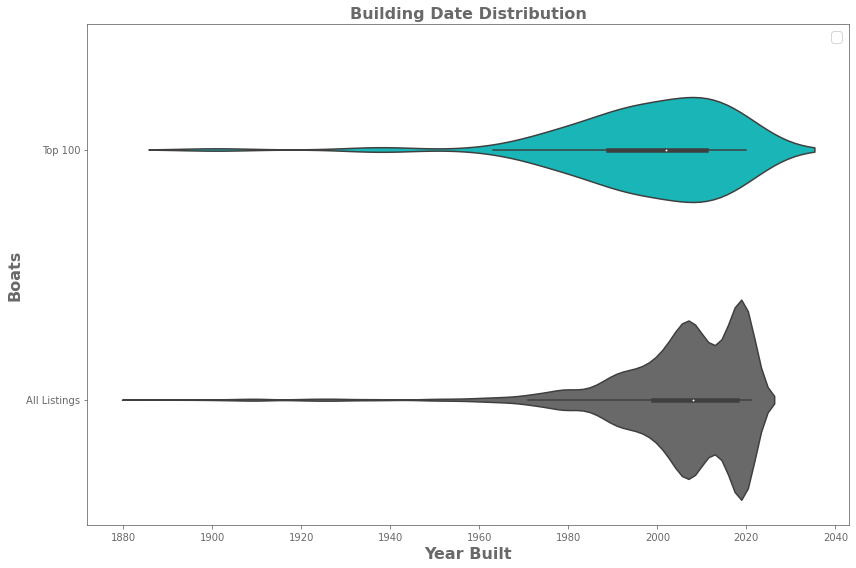

In [47]:
plot_std(tot_dat=clean_boats, typ='v',
        x_col='Year Built', y_col='is_top',
        tit='Building Date Distribution', xlab='Year Built', ylab='Boats',
        log_sel=False, alph_tot=.25, alph_100=.7)

No handles with labels found to put in legend.


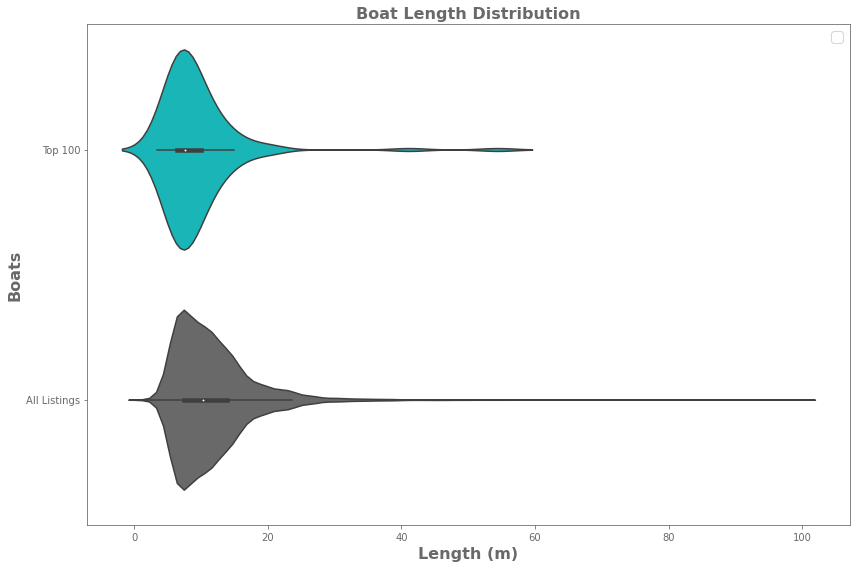

In [48]:
plot_std(tot_dat=clean_boats, typ='v',
        x_col='Length', y_col='is_top',
        tit='Boat Length Distribution', xlab='Length (m)', ylab='Boats',
        log_sel=False, alph_tot=.25, alph_100=.7)


No handles with labels found to put in legend.


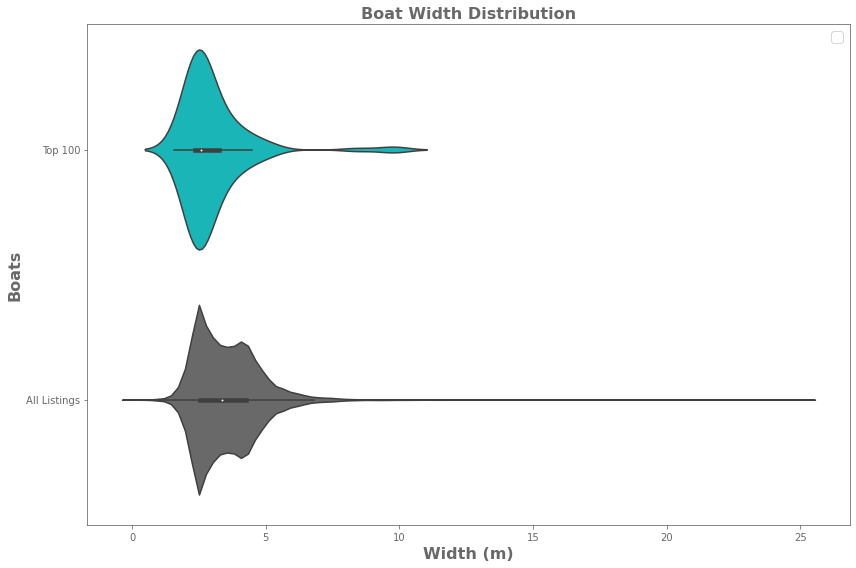

In [49]:
plot_std(tot_dat=clean_boats, typ='v',
        x_col='Width', y_col='is_top',
        tit='Boat Width Distribution', xlab='Width (m)', ylab='Boats',
        log_sel=False, alph_tot=.25, alph_100=.7)

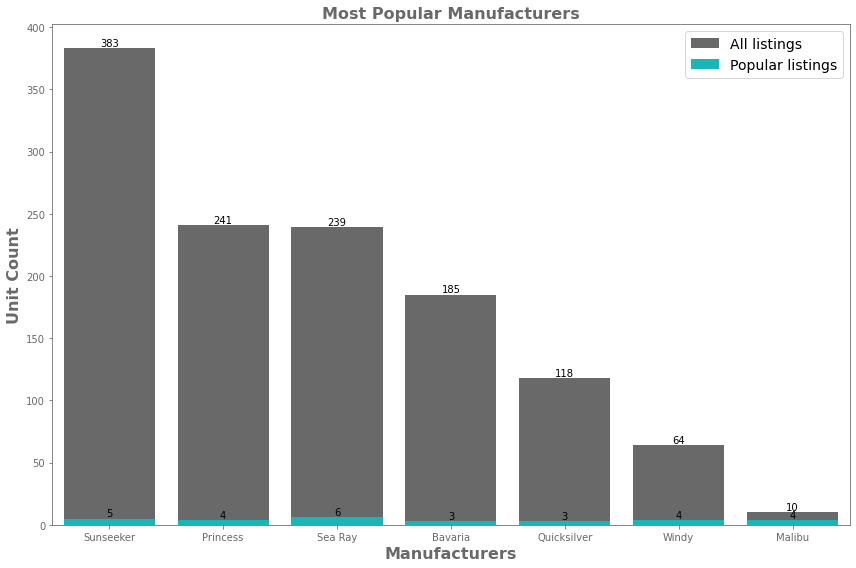

In [50]:
manu100_counts = top100_boats['Manufacturer'].value_counts()
manu100_counts = manu100_counts[manu100_counts>=3].sort_values(ascending=False)

manuTot_counts = clean_boats['Manufacturer'].value_counts()
manuTot_counts = manuTot_counts.loc[manuTot_counts.index.isin(manu100_counts.index)].sort_values(ascending=False)
manu100_counts = manu100_counts.reindex(manuTot_counts.index)

plot_std(tot_dat=manuTot_counts, top_100=manu100_counts, typ='b',
        x_col='x', y_col='y',
        tit='Most Popular Manufacturers', xlab='Manufacturers', ylab='Unit Count',
        log_sel=False,alph_tot=.25, alph_100=0.7)

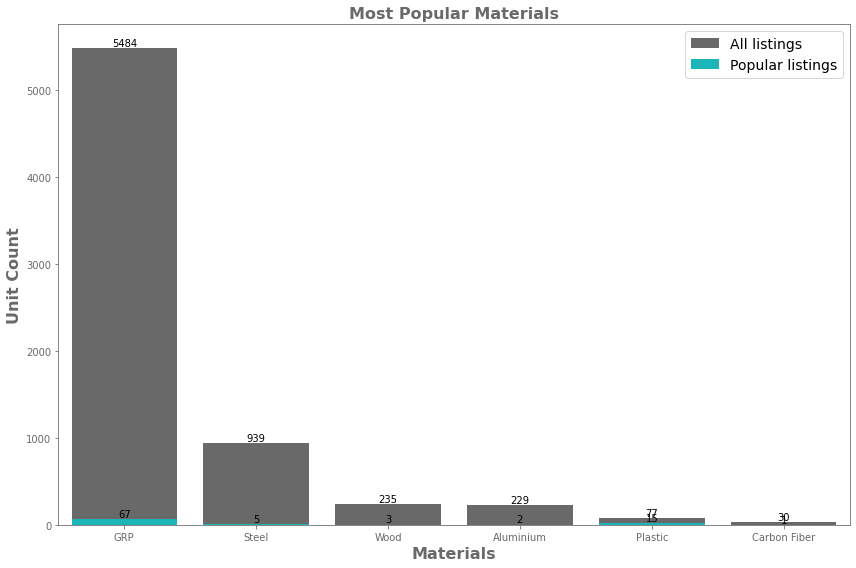

In [51]:
mat100_counts = top100_boats['Material'].value_counts()
matTot_counts = clean_boats['Material'].value_counts()
matTot_counts = matTot_counts[matTot_counts.index.isin(mat100_counts.index)]
mat100_counts = mat100_counts.reindex(matTot_counts.index)

plot_std(tot_dat=matTot_counts, top_100=mat100_counts, typ='b',
        x_col='x', y_col='y',
        tit='Most Popular Materials', xlab='Materials', ylab='Unit Count',
        log_sel=False,alph_tot=.25, alph_100=0.7)

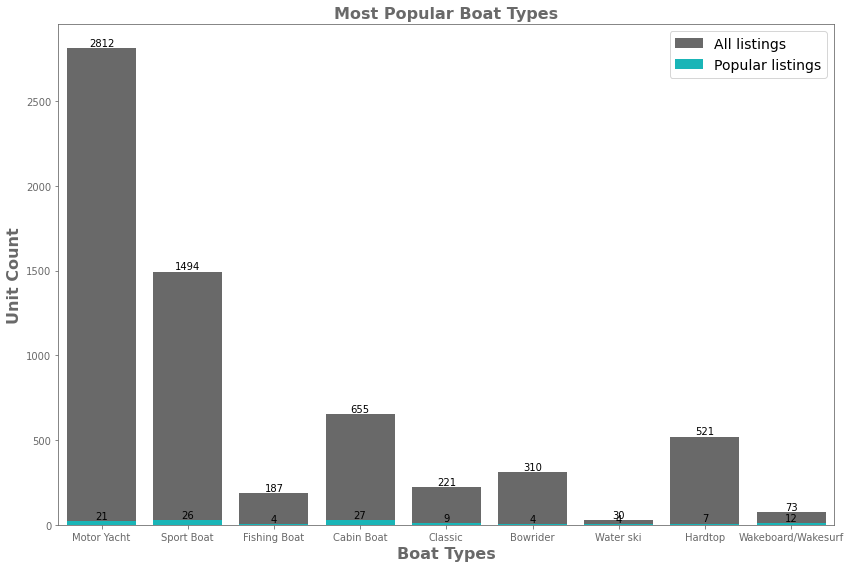

In [52]:
col = [col for col in clean_boats if "Boat Type" in col]
sum100_col = top100_boats[col].sum()
sum100_col = sum100_col[sum100_col > 3]

sumTot_col = clean_boats[col].sum()
sumTot_col = sumTot_col[sumTot_col.index.isin(sum100_col.index)]

sumTot_col.index = sumTot_col.index.str.replace("Boat Type ", "")
sum100_col.index = sum100_col.index.str.replace("Boat Type ", "")

sum100_col = sum100_col.reindex(sumTot_col.index)

plot_std(tot_dat=sumTot_col, top_100=sum100_col, typ='b',
        x_col='x', y_col='y',
        tit='Most Popular Boat Types', xlab='Boat Types', ylab='Unit Count',
        log_sel=False,alph_tot=.25, alph_100=0.7)